In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import time
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from tensorflow import keras
import tensorflow as tf

In [4]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [5]:
df = pd.read_pickle('mywafer.pkl')

In [8]:
df.head()

,index,diesize,lotname,waferindex,waferdims,train_test_label,failure_type,check_tuple,wafermap_reshape
0,0,1683.0,lot1,1.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,1683.0,lot1,2.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,1683.0,lot1,3.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,1683.0,lot1,4.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,1683.0,lot1,5.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745630 entries, 0 to 745629
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             745630 non-null  int64  
 1   diesize           745630 non-null  float64
 2   lotname           745630 non-null  object 
 3   waferindex        745630 non-null  float64
 4   waferdims         745630 non-null  object 
 5   train_test_label  171350 non-null  object 
 6   failure_type      171350 non-null  object 
 7   check_tuple       745630 non-null  bool   
 8   wafermap_reshape  745630 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 46.2+ MB


In [10]:
df_train = df[df['train_test_label']=='Training']
df_test = df[df['train_test_label']=='Test']
df_real = df[df['train_test_label'].isna()]

In [11]:
df_train.reset_index(inplace = True)
df_test.reset_index(inplace = True)
df_real.reset_index(inplace = True)
print(df_train.head(), df_test.head(), df_real.head())

   level_0  index  diesize lotname  waferindex waferdims train_test_label  \
0        0      0   1683.0    lot1         1.0  (45, 48)         Training   
1        1      1   1683.0    lot1         2.0  (45, 48)         Training   
2        2      2   1683.0    lot1         3.0  (45, 48)         Training   
3        3      3   1683.0    lot1         4.0  (45, 48)         Training   
4        4      4   1683.0    lot1         5.0  (45, 48)         Training   

  failure_type  check_tuple                                   wafermap_reshape  
0         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      level_0   index  diesize   lotname  waferindex w

In [9]:
df_train.drop(['level_0', 'index'], axis = 1, inplace = True)
df_test.drop(['level_0', 'index'], axis = 1, inplace = True)
df_real.drop(['level_0', 'index'], axis = 1, inplace = True)

/tmp/ipykernel_8213/2479246445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['level_0', 'index'], axis = 1, inplace = True)
/tmp/ipykernel_8213/2479246445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['level_0', 'index'], axis = 1, inplace = True)
/tmp/ipykernel_8213/2479246445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real.drop(['level_0', 'index'], axis = 1, inplace = True)


In [10]:
np.unique(df_train['failure_type'], return_counts = True)

(array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
        'Random', 'Scratch', 'none'], dtype=object),
 array([ 3415,   408,  2355,  7856,  1487,    54,   595,   394, 36341]))

In [11]:
np.unique(df_test['failure_type'], return_counts = True)

(array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
        'Random', 'Scratch', 'none'], dtype=object),
 array([   832,    146,   2772,   1126,   1971,     95,    257,    686,
        110560]))

In [12]:
np.unique(df_real['failure_type'], return_counts = True)

(array([nan, nan, nan, ..., nan, nan, nan], dtype=object),
 array([1, 1, 1, ..., 1, 1, 1]))

## 1. 결측 패턴 확인

In [13]:
img, count = np.unique(df_train['failure_type'], return_counts = True)

def check_failure(df, img_list):
    ct, e = 0, 0
    fig, axes = plt.subplots(3,3, figsize = (15,15))
    for i in range(len(img_list)):
        filter1 = img_list[i]
        data = df[df['failure_type'] == filter1]
        index = data.index[12]
        axes[e][ct].imshow(data['wafermap_reshape'][index], cmap = 'gray')
        title_font = {'fontsize': 16, 'fontweight': 'bold'}
        axes[e][ct].set_title(img_list[i], fontdict = title_font)
        ct += 1
        if (i == 2) | (i == 5):
            e += 1
            ct = 0
            
def check_failuretype(df, img_list):
    ct, e = 0, 0
    fig, axes = plt.subplots(3,3, figsize = (15,15))
    for i in range(len(img_list)):
        filter1 = img_list[i]
        data = df[df['failure_type'] == filter1]
        index = data.index[0]
        axes[e][ct].imshow(data['wafermap_reshape'][index], cmap = 'RdPu')
        title_font = {'fontsize': 20, 'fontweight': 'bold'}
        axes[e][ct].set_title(img_list[i], fontdict = title_font)
        ct += 1
        if (i == 2) | (i == 5):
            e += 1
            ct = 0

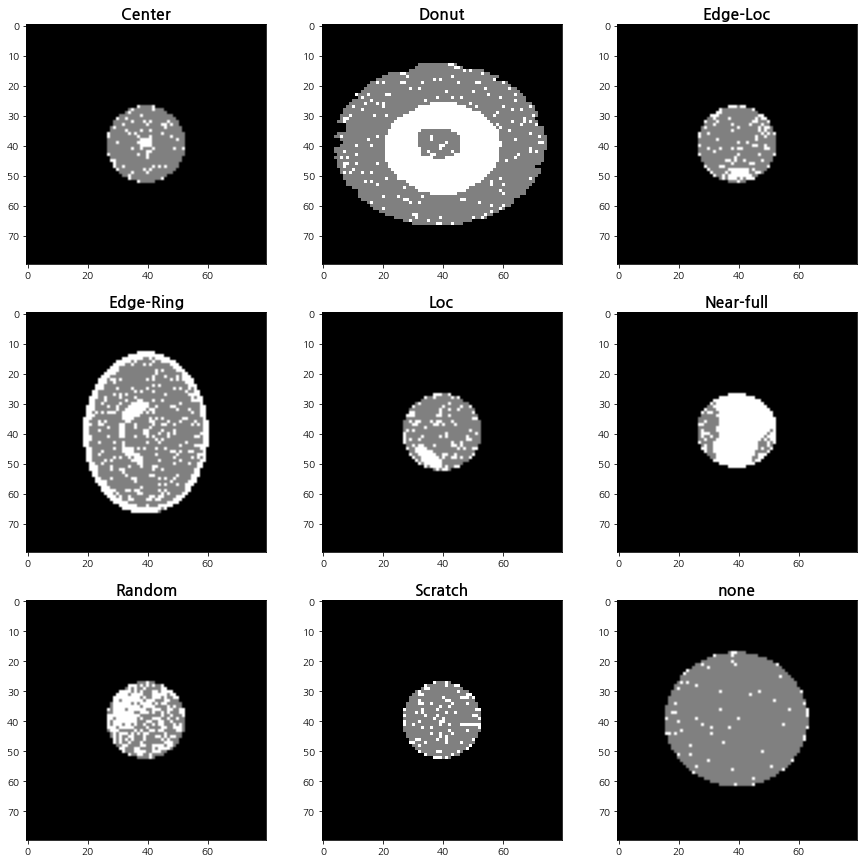

In [14]:
check_failure(df_train, img) # Donut, Edge-Ring 

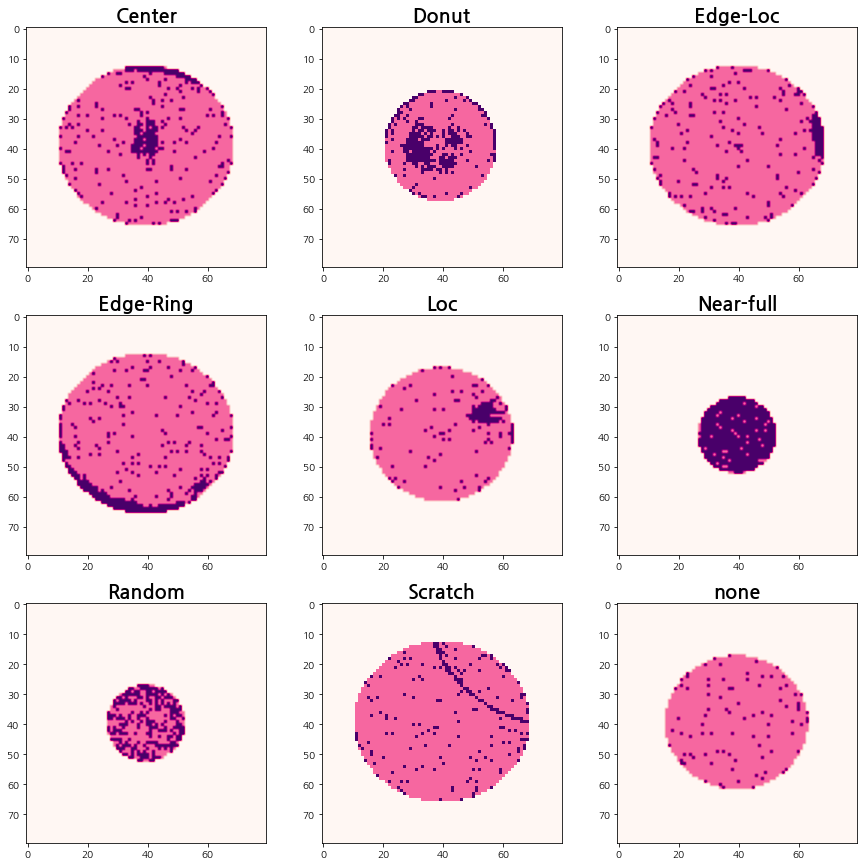

In [15]:
check_failuretype(df_train, img) # Center, Edge-Loc, Near-full

## 2. lot num별로 통계치 분석 

In [16]:
df11 = df[['lotname', 'diesize']]
df11.head()

,lotname,diesize
0,lot1,1683.0
1,lot1,1683.0
2,lot1,1683.0
3,lot1,1683.0
4,lot1,1683.0


In [17]:
g1 = df11.groupby('lotname').aggregate([np.mean])
g1

,diesize
,mean
lotname,
lot1,1683.00
lot10,533.00
lot100,533.00
lot10000,904.00
lot10001,904.00
...,...
lot9995,2006.88
lot9996,2006.36


Text(0.5, 1.0, 'lot별 diesize 평균의 분포')

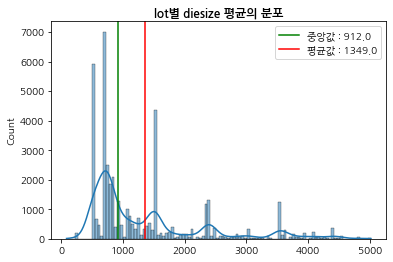

In [18]:
ax = sns.histplot(data = g1, kde = True, legend=True)
ax.axvline(g1.iloc[:, 0].median(), color='g', linewidth=1.5, label='중앙값 : '+ str(round(g1.iloc[:, 0].median(), 0)))
ax.axvline(g1.iloc[:, 0].mean(), color = 'r', linewidth = 1.5, label='평균값 : '+ str(round(g1.iloc[:, 0].mean(), 0)))
ax.legend()
ax.set_title('lot별 diesize 평균의 분포', fontweight =  'bold')

## lot number 별 waferdims and waferdims별 failure_type 확인

In [19]:
ex_df = df[['lotname', 'diesize', 'waferdims', 'failure_type']]
ex_df.head()

,lotname,diesize,waferdims,failure_type
0,lot1,1683.0,"(45, 48)",none
1,lot1,1683.0,"(45, 48)",none
2,lot1,1683.0,"(45, 48)",none
3,lot1,1683.0,"(45, 48)",none
4,lot1,1683.0,"(45, 48)",none


In [20]:
g2 = ex_df.groupby(['lotname', 'waferdims']).count()
g2

,,diesize,failure_type
lotname,waferdims,,
lot1,"(45, 48)",25,25
lot10,"(26, 26)",25,24
lot100,"(26, 26)",25,24
lot10000,"(34, 34)",2,0
lot10001,"(34, 34)",2,0
...,...,...,...
lot9995,"(42, 61)",25,4
lot9996,"(42, 61)",25,0
lot9997,"(34, 34)",23,5


## lot number별 들어가는 wafer 갯수
- 대부분의 <span style='background-color:#fff5b1'> 한 번의 lot 마다 wafer는 대략 25개</span>가 들어간다.

Text(0.5, 1.0, 'lot별 wafer 갯수')

<Figure size 720x360 with 0 Axes>

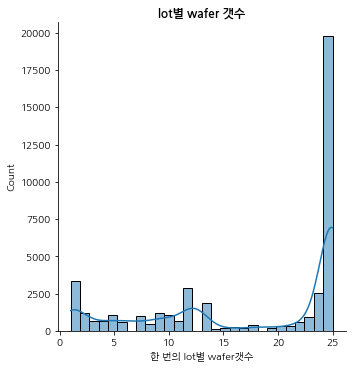

In [21]:
plt.figure(figsize = (10,5))
sns.displot(data = g2.iloc[:, 0], kde = True)
plt.xlabel('한 번의 lot별 wafer갯수', fontsize=10)
plt.title('lot별 wafer 갯수', weight = 'bold')

### wafer shape 별 상위 20개의 갯수

(0.0, 100000.0)

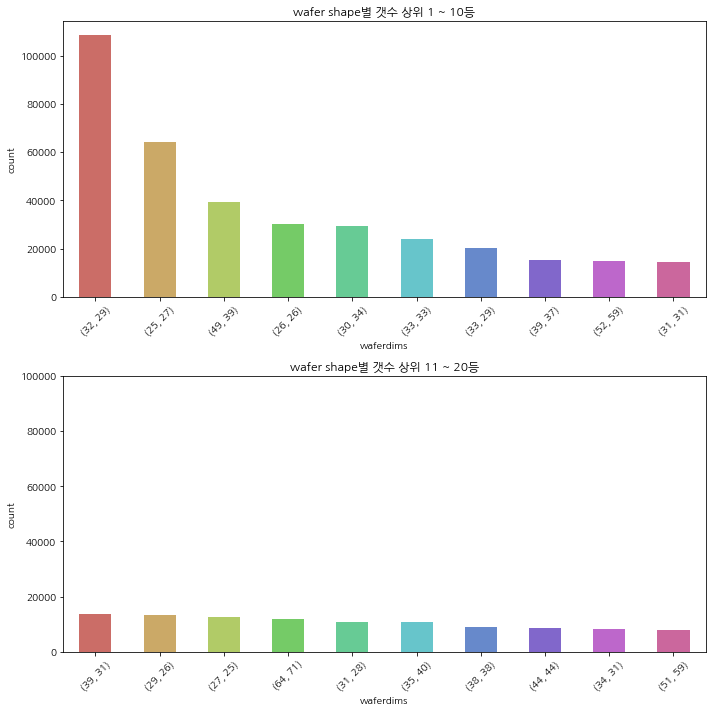

In [22]:
fig, axes = plt.subplots(2,1, figsize=(10,10),layout = 'tight')
sns.countplot(data = ex_df,
              x = 'waferdims',
              palette = 'hls', 
              saturation=0.75,
              width=0.5, 
              order = ex_df['waferdims'].value_counts().index[:10],
              ax = axes[0])
sns.countplot(data = ex_df,
              x = 'waferdims',
              palette = 'hls',
              saturation=0.75,
              width=0.5,
              order = ex_df['waferdims'].value_counts().index[10:20],
              ax = axes[1])



axes[0].set_title('wafer shape별 갯수 상위 1 ~ 10등')
axes[0].set_xticklabels(ex_df['waferdims'].value_counts().index[:10], rotation = 45)
axes[1].set_title('wafer shape별 갯수 상위 11 ~ 20등')
axes[1].set_xticklabels(ex_df['waferdims'].value_counts().index[10:20], rotation = 45)
axes[1].set_ylim([0,100000])

### wafer shape별 failure_type
1. <span style='background-color:#fff5b1'> 특정 wafer shape에서 특정 failure_type만 나온다면 그 wafer의 문제를 의심해보아야한다. </span>

[Text(0, 0, '(39, 31)'),
 Text(1, 0, '(29, 26)'),
 Text(2, 0, '(27, 25)'),
 Text(3, 0, '(64, 71)'),
 Text(4, 0, '(31, 28)'),
 Text(5, 0, '(35, 40)'),
 Text(6, 0, '(38, 38)'),
 Text(7, 0, '(44, 44)'),
 Text(8, 0, '(34, 31)'),
 Text(9, 0, '(51, 59)')]

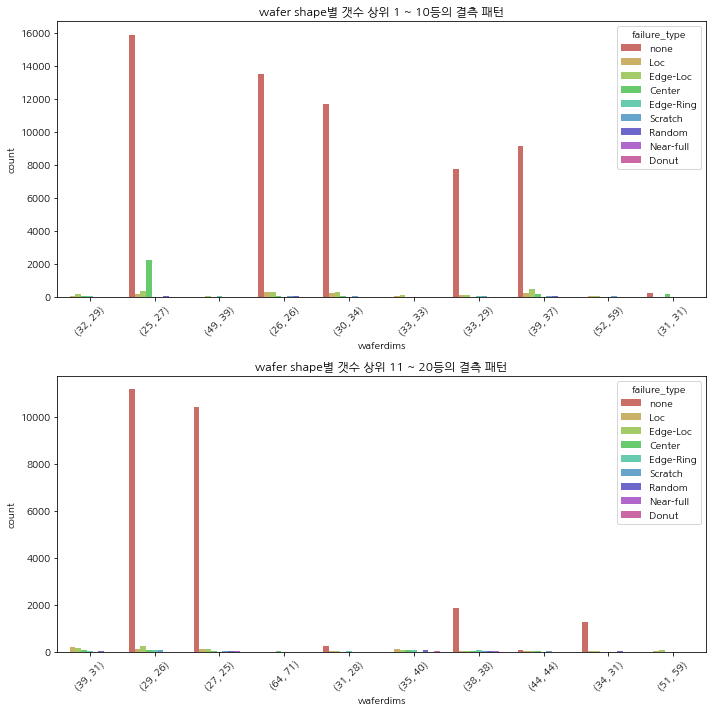

In [23]:
fig, axes = plt.subplots(2,1, figsize=(10,10),layout = 'tight')
sns.countplot(data = ex_df,
              x = 'waferdims',
              palette = 'hls',
              hue = 'failure_type',
              order = ex_df['waferdims'].value_counts().index[:10],
              ax = axes[0])
sns.countplot(data = ex_df,
              x = 'waferdims',
              palette = 'hls',
              hue = 'failure_type',
              order = ex_df['waferdims'].value_counts().index[10:20],
              ax = axes[1])

axes[0].set_title('wafer shape별 갯수 상위 1 ~ 10등의 결측 패턴')
axes[0].set_xticklabels(ex_df['waferdims'].value_counts().index[:10], rotation = 45)
axes[1].set_title('wafer shape별 갯수 상위 11 ~ 20등의 결측 패턴')
axes[1].set_xticklabels(ex_df['waferdims'].value_counts().index[10:20], rotation = 45)

### none 때문에 정확한 시각화가 안되기 때문에 none를 제외하고 결측 패턴만 확인
***조금 쉽게 확인하기 위해 failure_type를 category labeling 진행***

In [24]:
ex_df['failure_cat'] = ex_df['failure_type'].astype('category').cat.codes

/tmp/ipykernel_8213/3996801134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['failure_cat'] = ex_df['failure_type'].astype('category').cat.codes


In [25]:
ex_df.head()

,lotname,diesize,waferdims,failure_type,failure_cat
0,lot1,1683.0,"(45, 48)",none,8
1,lot1,1683.0,"(45, 48)",none,8
2,lot1,1683.0,"(45, 48)",none,8
3,lot1,1683.0,"(45, 48)",none,8
4,lot1,1683.0,"(45, 48)",none,8


In [26]:
filter2 = ex_df['failure_cat'] == 8
ex_df.drop(ex_df['failure_cat'][filter2].index, axis = 0, inplace = True)

/tmp/ipykernel_8213/1335769634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df.drop(ex_df['failure_cat'][filter2].index, axis = 0, inplace = True)


[Text(0, 0, '(64, 71)'),
 Text(1, 0, '(35, 40)'),
 Text(2, 0, '(31, 28)'),
 Text(3, 0, '(44, 44)'),
 Text(4, 0, '(51, 59)'),
 Text(5, 0, '(38, 38)'),
 Text(6, 0, '(34, 31)'),
 Text(7, 0, '(39, 37)'),
 Text(8, 0, '(56, 41)'),
 Text(9, 0, '(72, 72)')]

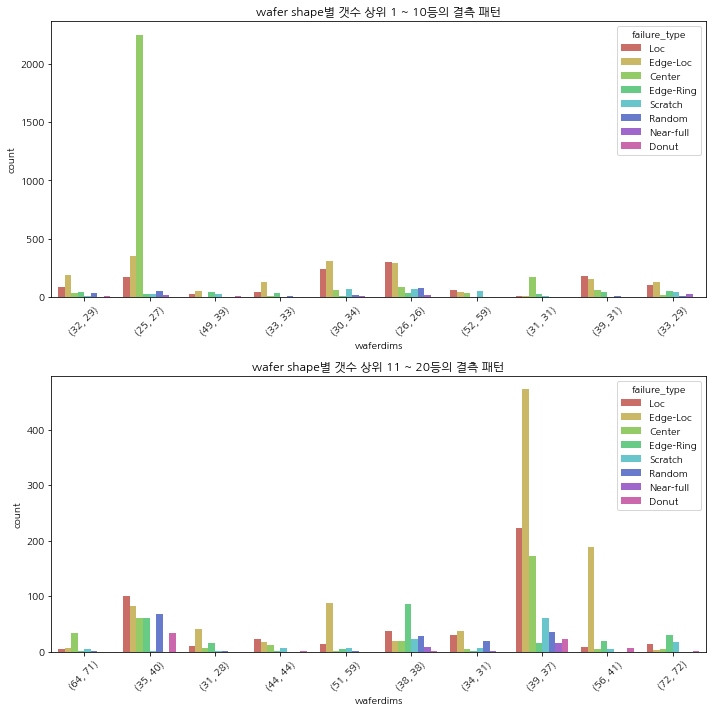

In [27]:
fig, axes = plt.subplots(2,1, figsize=(10,10),layout = 'tight')
sns.countplot(data = ex_df, 
              x = 'waferdims',
              palette = 'hls', 
              saturation=0.75,
              width=0.8, 
              hue = 'failure_type', 
              order = ex_df['waferdims'].value_counts().index[:10],
              ax = axes[0])
sns.countplot(data = ex_df, 
              x = 'waferdims', 
              palette = 'hls',
              hue = 'failure_type',
              saturation=0.75,
              width=0.8,
              order = ex_df['waferdims'].value_counts().index[10:20],
              ax = axes[1])

axes[0].set_title('wafer shape별 갯수 상위 1 ~ 10등의 결측 패턴')
axes[0].set_xticklabels(ex_df['waferdims'].value_counts().index[:10], rotation = 45)
axes[1].set_title('wafer shape별 갯수 상위 11 ~ 20등의 결측 패턴')
axes[1].set_xticklabels(ex_df['waferdims'].value_counts().index[10:20], rotation = 45)

### <span style='background-color:#fff5b1'> (25, 27), (39,37)의 wafer들은 공정의 문제보다 wafer의 문제를 의심해 보아야한다.

# <span style='background-color:#fff5b1'> 모델 설정 </span>
1. ***CNN***
2. ***DecisionTree***
3. ***RandomForest***
4. ***Flatten 후 DNN***

In [12]:
print(len(df_train))
print(df_train.shape)
print(len(df_test))
print(len(df_real))

52905
(52905, 10)
118445
574280


In [13]:
y_train = df_train['failure_type'].astype('category').cat.codes
y_test = df_test['failure_type'].astype('category').cat.codes

### X_train, X_test CNN을 돌릴 수 있는 형태로 변환

In [14]:
x = df_train['wafermap_reshape'][0]
lista = []
lista.append(x)
print(lista)
np.array(lista).shape

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]


(1, 80, 80)

In [15]:
X_tr = df_train['wafermap_reshape'].apply(lambda x: np.array(x))

In [16]:
X_te = df_test['wafermap_reshape'].apply(lambda x: np.array(x))

In [17]:
X_test = np.array([x for x in X_te])

In [18]:
X_train = np.array([x for x in X_tr])

In [34]:
print(X_train.shape)
print(X_test.shape)

(52905, 80, 80)
(118445, 80, 80)


In [36]:
# CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5,5), activation = 'relu', input_shape=(80, 80, 1),
                       padding = 'valid', data_format = 'channels_last'), # 2D는 평면
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(32, kernel_size = (5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(9)
])


model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
         optimizer = keras.optimizers.Adam(learning_rate = 0.001),
         metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 76, 76, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9248)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [37]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10


2023-07-16 00:55:03.112792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-07-16 00:55:04.906701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-16 00:55:04.927657: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fef6e775ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-16 00:55:04.927706: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2023-07-16 00:55:04.965645: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-16 00:55:05.333217: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lif

1654/1654 [==============================] - 22s 8ms/step - loss: 0.2901 - accuracy: 0.9222
Epoch 2/10
1654/1654 [==============================] - 13s 8ms/step - loss: 0.1154 - accuracy: 0.9653
Epoch 3/10
1654/1654 [==============================] - 13s 8ms/step - loss: 0.0740 - accuracy: 0.9764
Epoch 4/10
1654/1654 [==============================] - 13s 8ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 5/10
1654/1654 [==============================] - 13s 8ms/step - loss: 0.0408 - accuracy: 0.9869
Epoch 6/10
1654/1654 [==============================] - 13s 8ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 7/10
1654/1654 [==============================] - 13s 8ms/step - loss: 0.0256 - accuracy: 0.9914
Epoch 8/10
1654/1654 [==============================] - 13s 8ms/step - loss: 0.0180 - accuracy: 0.9942
Epoch 9/10
1654/1654 [==============================] - 13s 8ms/step - loss: 0.0167 - accuracy: 0.9943
Epoch 10/10
1654/1654 [==============================] - 13s 8ms/step - loss: 0.0149

In [38]:
model.evaluate(X_test, y_test)

3702/3702 [==============================] - 16s 4ms/step - loss: 1.0204 - accuracy: 0.7480


[1.0203837156295776, 0.7480011582374573]

In [39]:
# CNN 
#kernel size 크게하면 한번 큰부분을 처리 ==> weight 갯수 많아짐
#kernel size 가지고 놀아보기
#weight을 저장했다가 불러와서 분석 ==> 시각화
# Tree
# Flatten

model.predict(X_test)

3702/3702 [==============================] - 12s 3ms/step


array([[ -6.0863924 , -10.84822   ,   0.3346854 , ...,  -2.3037777 ,
         -0.85622704,  10.42917   ],
       [ -7.7697306 , -15.3616085 ,   0.799375  , ...,  -1.6361233 ,
         -3.7624474 ,  10.928119  ],
       [ -5.4461575 ,  -9.874843  ,   0.790912  , ...,  -2.2096438 ,
          0.8368386 ,   9.697458  ],
       ...,
       [ -5.3112283 , -12.318214  ,   6.473806  , ..., -10.886299  ,
         -6.66406   ,  -4.165399  ],
       [ -9.600143  , -10.494322  ,  10.433382  , ...,  -9.686574  ,
        -10.179565  ,  -9.757643  ],
       [ -4.8217993 ,  -9.645205  ,   6.71055   , ..., -12.289094  ,
         -5.818341  ,  -4.23416   ]], dtype=float32)

In [40]:
model.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
 array([[[[-9.49563459e-02, -1.69008113e-02,  1.46495789e-01,
           -2.21365690e-01, -1.87353924e-01, -1.97510764e-01,
           -7.80920908e-02, -1.89640939e-01, -3.75168584e-02,
           -1.03054203e-01,  1.35152936e-01, -1.66947216e-01,
           -6.58321679e-02, -1.05625302e-01, -3.08315977e-02,
           -1.47104815e-01, -1.50390908e-01, -1.41897798e-01,
            9.16904062e-02,  2.50001490e-01, -3.54140550e-02,
            3.53964381e-02, -5.43220602e-02,  1.20575406e-01,
            4.45745476e-02, -9.74696949e-02, -9.83806849e-02,
           -2.01147437e-01,  2.25559384e-01,  7.77388588e-02,
           -1.51367217e-01, -8.63823891e-02]],
 
         [[-1.02661133e-01,  4.47887965e-02, -1.72865644e-01,
           -1.30357504e-01, -3.62575427e-02,  1.99348759e-02,
           -4.51792404e-02,  7.76224188e-04,  1.51553199e-01,
           -2.97145150e-03,  2.02410612e-02,  1.03823788e-01,
       

In [41]:
model.save('model_CNN.h5')

In [20]:
m_cnn = tf.keras.models.load_model('model_CNN.h5')

In [21]:
test_loss, test_acc = m_cnn.evaluate(X_test, y_test)

2023-07-16 02:20:02.420098: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902


  34/3702 [..............................] - ETA: 17s - loss: 0.3065 - accuracy: 0.9540  

2023-07-16 02:20:04.171005: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3702/3702 [==============================] - 22s 5ms/step - loss: 1.0204 - accuracy: 0.7480
